![alt text](statements/T12.png "T12")

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
n = 200

In [3]:
X = np.random.poisson(10, n) # выборка

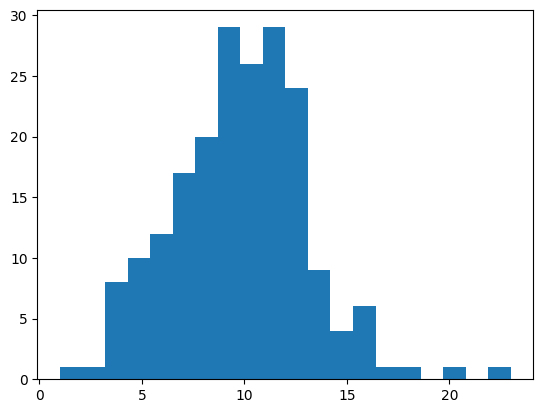

In [4]:
plt.hist(X, bins=20)
plt.show()

In [5]:
print(len(X), np.mean(X), np.std(X))

200 9.67 3.249784608247137


In [6]:
# В задании не сказано про уровень доверия, возьмём стандартные 5%
alpha = 0.05

In [7]:
def get_interval(X, alpha):
    mean = np.mean(X)
    count = np.sum(X)
    z1 = stats.chi2.ppf(alpha / 2, count * 2) / 2
    z2 = stats.chi2.ppf(1 - alpha / 2, count * 2 + 2) / 2
    return [z1 / len(X), z2 / len(X)]
# https://en.m.wikipedia.org/wiki/Poisson_distribution#Confidence_interval

In [8]:
conf_int = get_interval(X, alpha)
conf_int

[9.243785841938829, 10.110796745179925]

In [9]:
intervals = []
Theta = np.linspace(1e-3, 20, 201)
for theta in Theta:
    X_theta = np.random.poisson(theta, n)
    intervals.append(get_interval(X_theta, alpha))
intervals = np.array(intervals)
ints_T = np.transpose(intervals)
print(np.mean(ints_T[1] - ints_T[0]), np.mean(ints_T[1] - ints_T[0]) * np.sqrt(n))

nan nan


In [24]:
def draw(Theta, intervals):
    fig = plt.figure(figsize=(16, 7))
    for i in range(len(Theta)):
        plt.plot([Theta[i], Theta[i]], intervals[i], 'b')
    plt.plot([0, 20], [0, 20], 'g')
    plt.xlabel('θ')
    plt.ylabel('Доверительный интервал')
    plt.title('Доверительные интервалы для разных значений θ')
    plt.show()

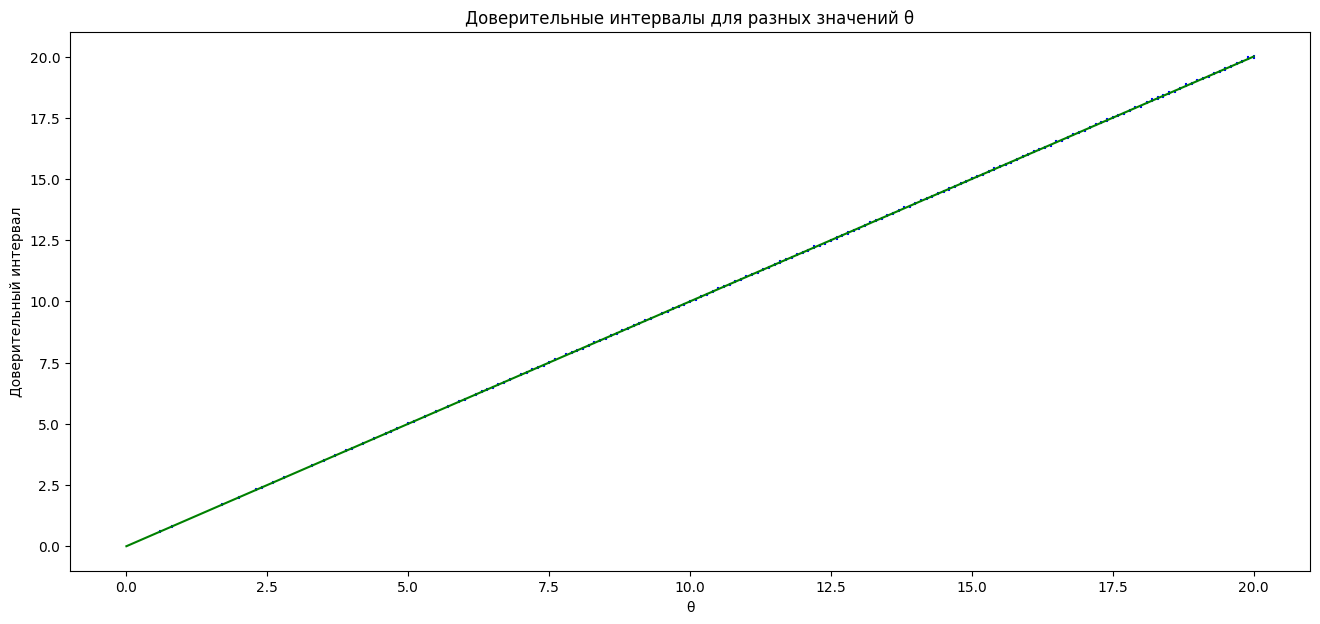

In [25]:
draw(Theta, intervals)

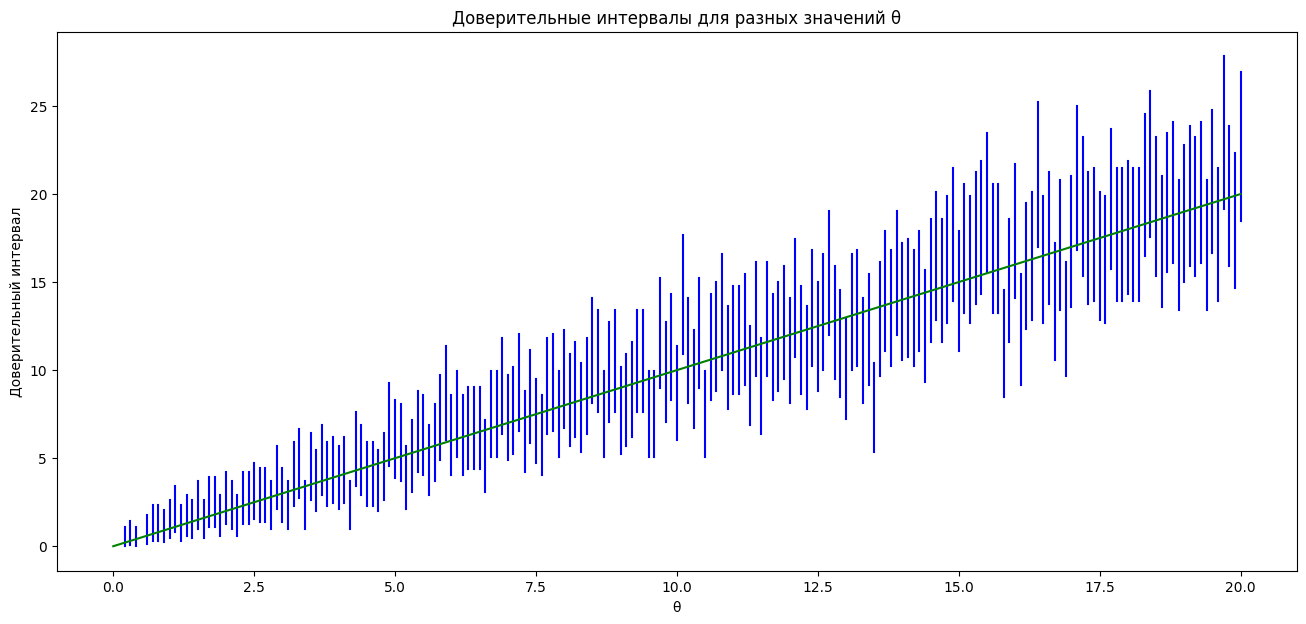

0.9303482587064676


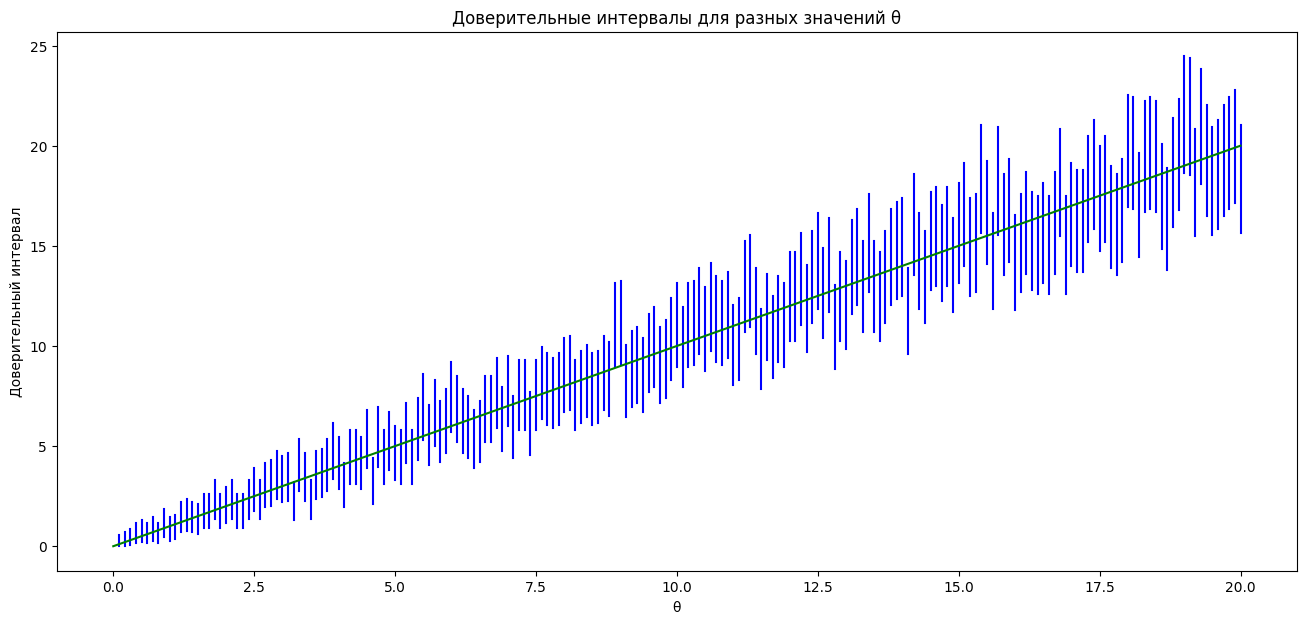

0.9651741293532339


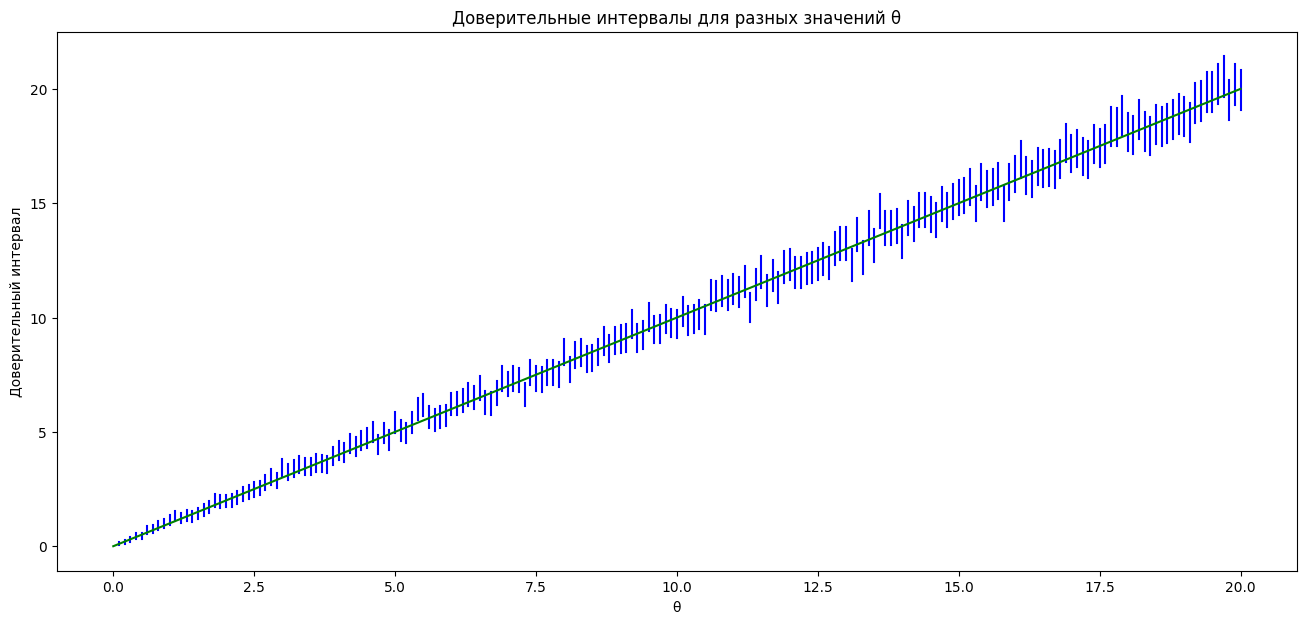

0.9502487562189055


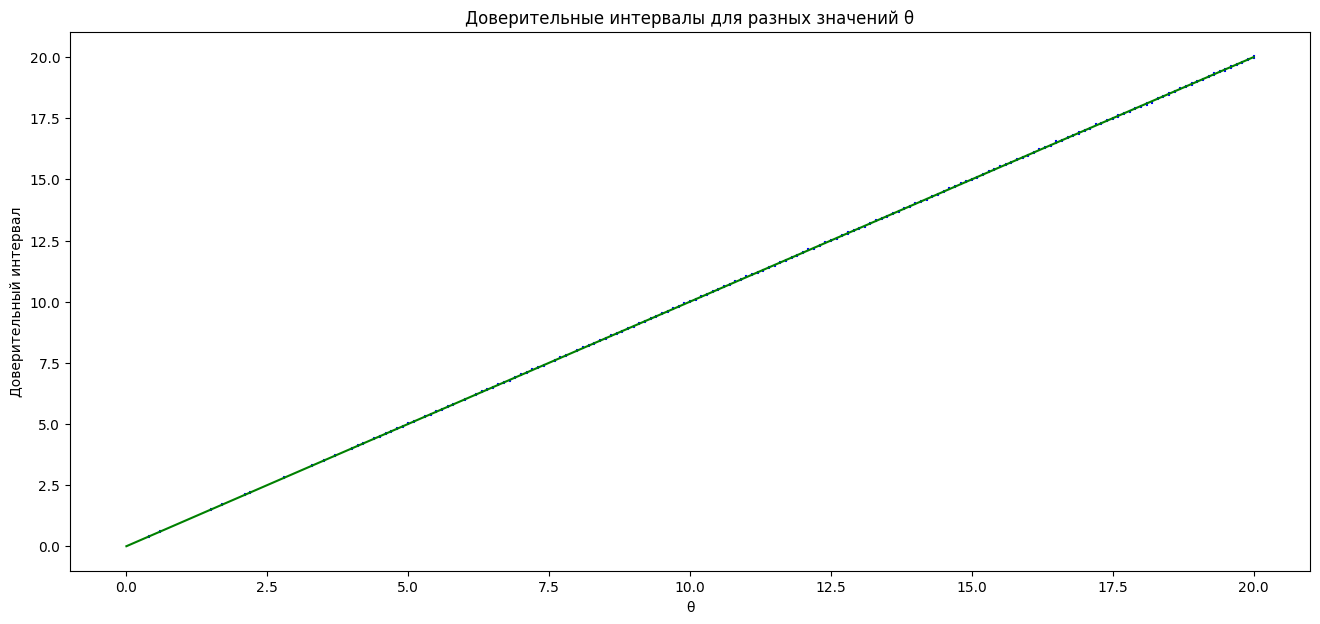

0.945273631840796


In [26]:
for n in [5, 10, 100, 100000]:
    s = 0
    intervals = []
    Theta = np.linspace(1e-3, 20, 201)
    for theta in Theta:
        X_theta = np.random.poisson(theta, n)
        intervals.append(get_interval(X_theta, alpha))
        s += 1 if intervals[-1][0] < theta and intervals[-1][1] > theta else 0
    draw(Theta, intervals)
    print(s / len(intervals))